In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import cv2
from tensorflow.keras.preprocessing.image import array_to_img, ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D

# Data 

def image_to_array(image):
    image = np.array([int(elem) for elem in image.split(" ")])
    image = image.reshape(96,96,1) 
    return image

def get_training_data():
    data = pd.read_csv("/kaggle/input/facial-keypoints-detection/training.zip")
    data = data.fillna(method = "ffill")
    
    images = [image_to_array(image) for image in np.array(data["Image"])] 
    x_train, x_test, y_train, y_test = train_test_split(np.array(images, dtype = float), data.drop(["Image"], axis = 1))

    return x_train, x_test, y_train, y_test

def get_testing_data():
    data = pd.read_csv("/kaggle/input/facial-keypoints-detection/test.zip")
    images = [image_to_array(image) for image in np.array(data["Image"])] 

    return np.array(images, dtype = float)

In [2]:
x_train, x_test, y_train, y_test = get_training_data()

In [3]:
test_image = get_testing_data()

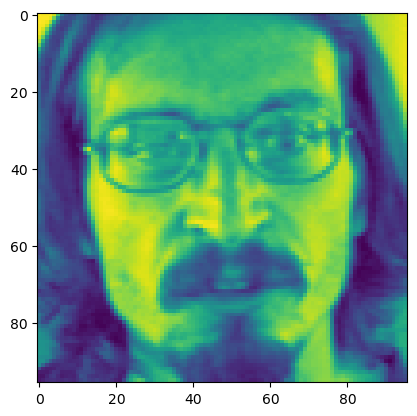

In [4]:
plt.imshow(x_train[0])

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape = (96,96,1),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2) ),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(30,activation  = "relu")
    
])

model.compile(
    optimizer = "adam",
    loss = "mae",
    metrics = ["accuracy"]
)

model.fit(x_train.astype(float), y_train.astype(float), epochs = 35)


Epoch 1/35
166/166 [==============================] - 152s 905ms/step - loss: 13.1519 - accuracy: 0.3004
Epoch 2/35
166/166 [==============================] - 149s 898ms/step - loss: 5.4295 - accuracy: 0.4372
Epoch 3/35
166/166 [==============================] - 149s 896ms/step - loss: 4.2899 - accuracy: 0.4798
Epoch 4/35
166/166 [==============================] - 150s 905ms/step - loss: 4.0940 - accuracy: 0.4949
Epoch 5/35
166/166 [==============================] - 151s 912ms/step - loss: 3.7466 - accuracy: 0.5079
Epoch 6/35
166/166 [==============================] - 150s 903ms/step - loss: 3.6127 - accuracy: 0.5134
Epoch 7/35
166/166 [==============================] - 150s 901ms/step - loss: 3.6204 - accuracy: 0.5354
Epoch 8/35
166/166 [==============================] - 151s 909ms/step - loss: 3.5455 - accuracy: 0.5486
Epoch 9/35
166/166 [==============================] - 151s 908ms/step - loss: 3.4796 - accuracy: 0.5554
Epoch 10/35
166/166 [==============================] - 149s 900

In [6]:
pred = model.predict(test_image)

56/56 [==============================] - 13s 226ms/step


In [7]:
id_lookup_table = pd.read_csv("/kaggle/input/facial-keypoints-detection/IdLookupTable.csv")
submission = pd.read_csv("/kaggle/input/facial-keypoints-detection/SampleSubmission.csv")

id_lookup_table.head()
submission.head()

features_n = list(id_lookup_table['FeatureName'])
img_ids = list(id_lookup_table['ImageId']-1)
row_ids = list(id_lookup_table['RowId'])

features_lst = [features_n.index(feature) for feature in features_n]
    
predictions = [pred[x][y] for x,y in zip(img_ids, features_lst)]
submission = pd.DataFrame({
    "RowId":row_ids,
    "Location":predictions
})
submission.to_csv("submission.csv",index = False)
